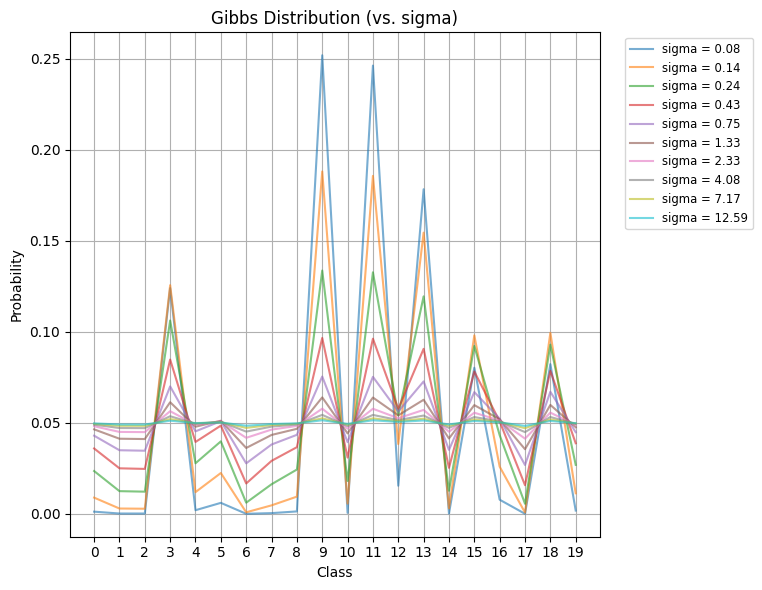

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_prob_dist(energies, sigma):
    if sigma == 0:
        probs = np.zeros(len(energies))
        probs[np.argmin(energies)] = 1.0
        return probs
    unnormalized_probs = np.exp(-energies / sigma) 
    return unnormalized_probs / np.sum(unnormalized_probs)

k = 20
sigmas = np.logspace(-1.1, 1.1, 10)
energies = np.random.rand(k)

plt.figure(figsize=(8, 6))

for sigma in sigmas:
    probs = gibbs_prob_dist(energies, sigma)
    plt.plot(range(k), probs, label=f'sigma = {sigma:.2f}', alpha=0.6)

plt.xlabel('Class')
plt.ylabel('Probability')
plt.title(f'Gibbs Distribution (vs. sigma)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize='small')
plt.xticks(np.arange(k))
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_956984/1476738577.py:7: RuntimeWarning: overflow encountered in exp
  numerator = np.sum(np.exp(scaling_factor * energies))
/tmp/ipykernel_956984/1476738577.py:8: RuntimeWarning: overflow encountered in scalar power
  denominator = np.sum(np.exp(energies))**scaling_factor
/tmp/ipykernel_956984/1476738577.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.log(numerator / denominator)
/tmp/ipykernel_956984/1476738577.py:9: RuntimeWarning: divide by zero encountered in log
  return np.log(numerator / denominator)
/home/ubuntu/nethome-blazejb/minimol/.minimol_p3-12/lib/python3.12/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


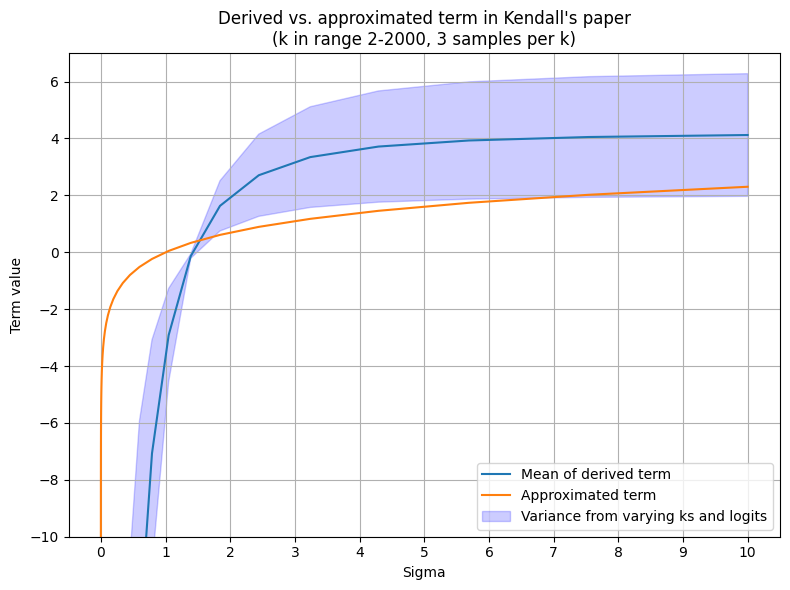

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def reg_term(energies, sigma):
    scaling_factor = 2 / sigma**2
    numerator = np.sum(np.exp(scaling_factor * energies))
    denominator = np.sum(np.exp(energies))**scaling_factor
    return np.log(numerator / denominator)

sigmas = np.logspace(-5, 1, 50)
ks = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
num_samples_per_k = 3
derived_curves = []

for k in ks:
    for _ in range(num_samples_per_k):
        logits = np.random.randn(k)
        derived_terms = [reg_term(logits, sigma) for sigma in sigmas]
        derived_curves.append(derived_terms)

derived_curves = np.array(derived_curves)

mean_derived = np.mean(derived_curves, axis=0)
var_derived = np.var(derived_curves, axis=0)

plt.figure(figsize=(8, 6))
plt.plot(sigmas, mean_derived, label='Mean of derived term')

approximated_terms = np.log(sigmas)
plt.plot(sigmas, approximated_terms, label='Approximated term')

plt.fill_between(sigmas, mean_derived - np.sqrt(var_derived), mean_derived + np.sqrt(var_derived), color='blue', alpha=0.2, label='Variance from varying ks and logits')

plt.ylim(-10, 7)
# plt.xscale('log')
plt.xlabel('Sigma')s
plt.xticks(np.arange(max(sigmas) + 1))
plt.ylabel('Term value')
plt.title('Derived vs. approximated term in Kendall\'s paper\n(k in range 2-2000, 3 samples per k)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_980287/3135842539.py:10: RuntimeWarning: invalid value encountered in log
  loss_values_sigma = np.log(kendalls_loss_sigma(L_grid_sigma, sigma_grid))
/tmp/ipykernel_980287/3135842539.py:18: RuntimeWarning: invalid value encountered in log
  loss_values_weight = np.log(kendalls_loss_weight(L_grid_weight, weight_grid))


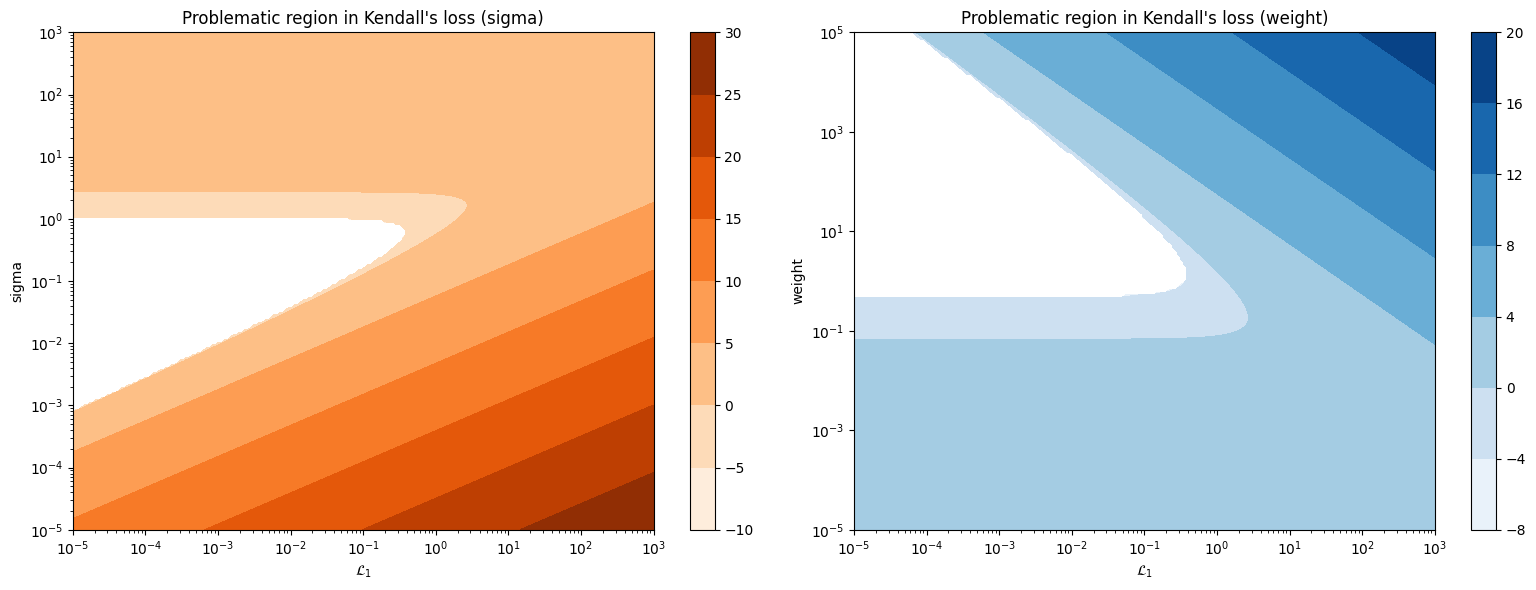

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = np.logspace(-5, 3, 200)

# figure with sigma
sigma = np.logspace(-5, 3, 200)
L_grid_sigma, sigma_grid = np.meshgrid(L, sigma)
kendalls_loss_sigma = lambda loss, std: (1 / (2 * (std**2))) * loss + np.log(std)
loss_values_sigma = np.log(kendalls_loss_sigma(L_grid_sigma, sigma_grid))

# figure with weight
# weight = 1 / (2 * sigma^2)
# So, sigma = sqrt(1 / (2 * weight))
weight = np.logspace(-5, 5, 200)
L_grid_weight, weight_grid = np.meshgrid(L, weight)
kendalls_loss_weight = lambda loss, weight: weight * loss - 0.5 * np.log(2 * weight)
loss_values_weight = np.log(kendalls_loss_weight(L_grid_weight, weight_grid))

# Plt stuff
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
cp1 = plt.contourf(L_grid_sigma, sigma_grid, loss_values_sigma, cmap='Oranges')
plt.colorbar(cp1)
plt.title("Problematic region in Kendall's loss (sigma)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\mathcal{L}_1$')
plt.ylabel('sigma')

plt.subplot(1, 2, 2)
cp2 = plt.contourf(L_grid_weight, weight_grid, loss_values_weight, cmap='Blues')
plt.colorbar(cp2)
plt.title("Problematic region in Kendall's loss (weight)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\mathcal{L}_1$')
plt.ylabel('weight')

plt.tight_layout()
plt.show()


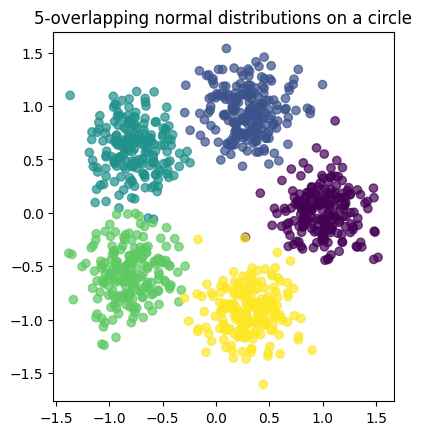

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_mixture_on_circle(n_classes=3, samples_per_class=100, radius=5.0, variance=1.0, seed=None):
    x, y = [], []
    
    np.random.seed(seed)
    angles = np.linspace(0, 2 * np.pi, n_classes, endpoint=False)
    
    for i, angle in enumerate(angles):
        mean = np.array([radius * np.cos(angle), radius * np.sin(angle)])
        covariance = np.eye(2) * variance
        samples = np.random.multivariate_normal(mean, covariance, samples_per_class)
        x.append(samples)
        y.append(np.full(samples_per_class, i))
    
    return np.vstack(x), np.hstack(y)

n_classes = 5
samples_per_class = 200
radius = 1.0
variance = 0.05

x, y = generate_gaussian_mixture_on_circle(
    seed=42,
    radius=radius,
    variance=variance,
    n_classes=n_classes,
    samples_per_class=samples_per_class, 
) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"{n_classes}-overlapping normal distributions on a circle")
plt.show()

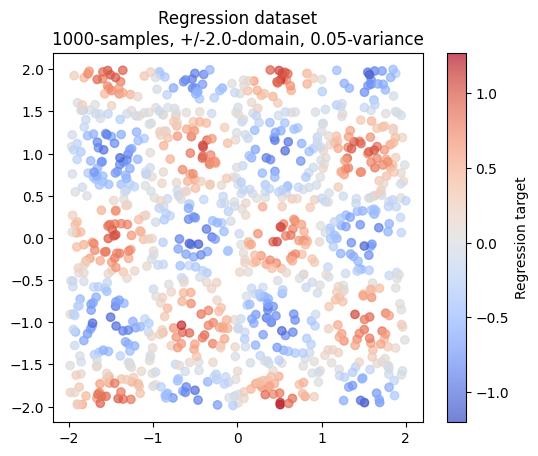

In [40]:
def generate_regression_dataset(samples=1000, domain_range=2.0, variance=0.1, seed=None):
    np.random.seed(seed)
    x1 = np.random.uniform(-domain_range, domain_range, samples)
    x2 = np.random.uniform(-domain_range, domain_range, samples)
    X_reg = np.column_stack((x1, x2))
    y_reg = np.sin(x1 * np.pi) * np.cos(x2 * np.pi) + np.random.normal(0, variance, samples)
    return X_reg, y_reg

# Parameters
samples = 1000
domain_range = 2.0
random_state = 42

# Generate regression dataset
X_reg, y_reg = generate_regression_dataset(
    samples=samples,
    domain_range=domain_range,
    random_state=random_state
)

# Visualize the input space
plt.scatter(X_reg[:, 0], X_reg[:, 1], c=y_reg, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Regression target')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Regression dataset\n{samples}-samples, +/-{domain_range}-domain, {variance}-variance')
plt.show()


/tmp/ipykernel_1005296/2816508466.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


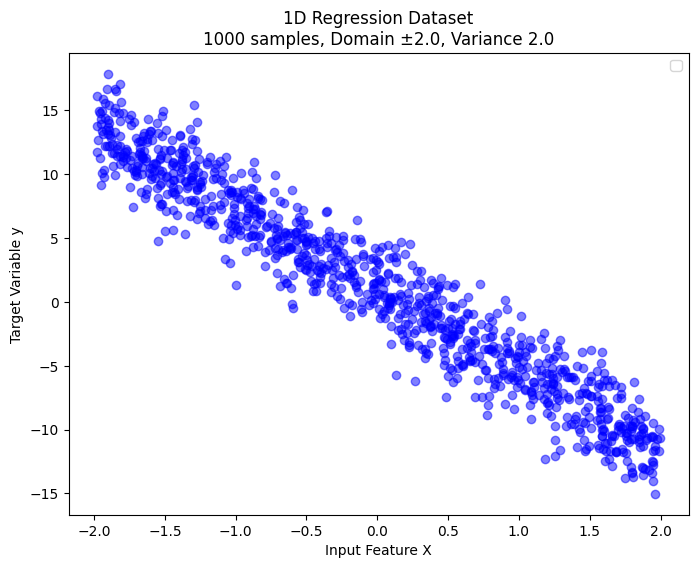

In [5]:
import random

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


def generate_1d_regression_dataset(f, samples=1000, domain_range=2.0, variance=0.1, seed=42, as_tensors=False):
    np.random.seed(seed)
    x = np.random.uniform(-domain_range, domain_range, samples).reshape(-1, 1)
    y = f(x).flatten() + np.random.normal(0, variance, samples)
    if as_tensors:
        x_tensor = torch.from_numpy(x).float()
        y_tensor = torch.from_numpy(y).float().view(-1, 1)
        return x_tensor, y_tensor
    return x, y

np.random.seed(42)

x, y = generate_1d_regression_dataset(
    f=lambda x: np.random.uniform(-10, 10) * x + np.random.uniform(-10, 10),
    samples=1000,
    domain_range=2.0,
    variance=2.0,
    seed=42
)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title(f'1D Regression Dataset\n{1000} samples, Domain ±{2.0}, Variance {2.0}')
plt.xlabel('Input Feature X')
plt.ylabel('Target Variable y')
plt.legend()
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


class LinearRegressionModel(nn.Module):
    def __init__(self, uw: bool = False):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        self.log_variance = nn.Parameter(torch.tensor(2.0), requires_grad=True) if uw else None
        self.criterion = nn.MSELoss()

    def forward(self, x):
        return self.linear(x)
    
    def _get_log_sqrt_var(self):
        return 0.5 * self.log_variance if self.log_variance else None
    
    def _get_loss_weight(self):
        return 0.5 * torch.exp(-self.log_variance) if self.log_variance else None

    def compute_loss(self, y, y_true):
        if self.log_variance:
            return self._get_loss_weight() * self.criterion(y, y_true) + self._get_log_sqrt_var()
        
        return self.criterion(y, y_true)


def run(variance, epochs=10, samples=1000, batch_size=128, seed=42, lr=1e-1, uncertainty_weighing: bool = False):
    x, y = generate_1d_regression_dataset(
        f=lambda x: np.random.uniform(-10, 10) * x + np.random.uniform(-10, 10),
        samples=samples,
        domain_range=2.0,
        variance=variance,
        seed=seed,
        as_tensors=True
    )

    model = LinearRegressionModel(uw=uncertainty_weighing)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    dataloader = DataLoader(TensorDataset(x, y), batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        epoch_loss = 0.0
        for x, y_true in dataloader:
            optimizer.zero_grad()
            outputs = model(x)
            loss = model.compute_loss(outputs, y_true)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * y_true.size(0)
        
        epoch_loss /= samples
        # print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

    if uncertainty_weighing:
        return torch.exp(model.log_variance).detach().numpy()
        # return model._get_loss_weight().detach().numpy()
    
    return epoch_loss

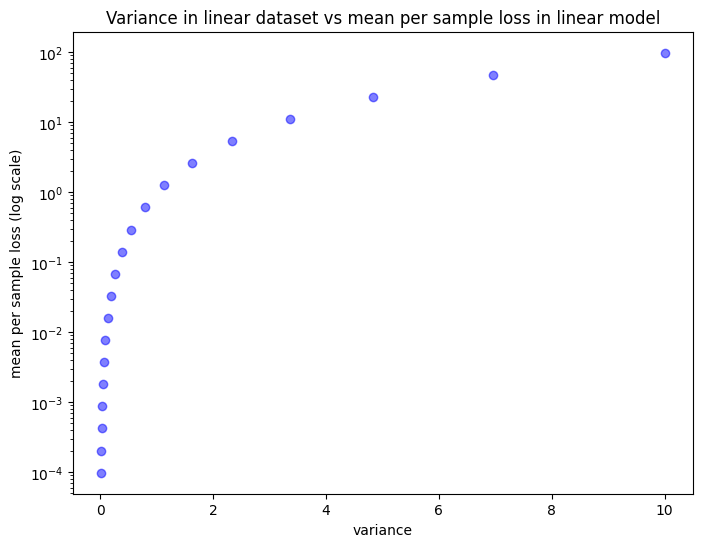

In [56]:
data_variances = np.logspace(-2, 1, 20)
losses = []
for variance in data_variances:
    loss = run(variance)
    losses.append(loss)

plt.figure(figsize=(8, 6))
plt.scatter(data_variances, losses, c='blue', alpha=0.5)
plt.title(f'Variance in linear dataset vs mean per sample loss in linear model')
plt.xlabel('variance')
plt.ylabel('mean per sample loss (log scale)')
plt.yscale('log')
plt.show()

In [4]:
import numpy as np

true_vars = np.logspace(-2.5,1,20)
learned_vars = []
std_learned_vars = []
for variance in true_vars:
    var_samples = []
    for seed in range(1, 6):
        var_samples.append(run(variance, samples=15000, epochs=10, lr=2e-1, seed=seed, uncertainty_weighing=True))
    std_learned_vars.append(np.std(var_samples))
    learned_vars.append(np.mean(var_samples))

plt.figure(figsize=(8, 6))
plt.scatter(true_vars, learned_vars, c='blue', alpha=0.5)
plt.errorbar(true_vars, learned_vars, yerr=std_learned_vars, fmt='o', ecolor='lightblue', elinewidth=3, capsize=0, alpha=0.5)
plt.plot(true_vars, true_vars, c='gray', alpha=0.2)
plt.title(f'True vs learned variance using uncertainty weighing')
plt.xlabel('true variance')
plt.ylabel('learned variance')
plt.xscale('log')
plt.yscale('log')
plt.show()

NameError: name 'generate_1d_regression_dataset' is not defined

In [47]:
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error as mae

true_vars = np.logspace(-2,1,20)
num_samples = np.floor(np.logspace(2, 4.4, 10))

corr_coeffs = []
std_corr_coeffs = []
MAEs = []
std_MAEs = []
p_values = []
std_p_values = []

for n in num_samples:
    corr_samples, p_val_samples, mae_samples = [], [], []
    for seed in range(1, 6):
        learned_vars = []
        for variance in true_vars:
            learned_vars.append(run(variance, samples=int(n), epochs=10, seed=seed, uncertainty_weighing=True))
        spearman_corr, p_value = stats.spearmanr(true_vars, learned_vars)
        mae_samples.append(mae(true_vars, learned_vars))
        p_val_samples.append(p_value)
        corr_samples.append(spearman_corr)
    # correlation coeff
    corr_coeffs.append(np.mean(corr_samples))
    std_corr_coeffs.append(np.std(corr_samples))
    # p-vals
    p_values.append(np.mean(p_val_samples))
    std_p_values.append(np.std(p_val_samples))
    # mean abs error
    MAEs.append(np.mean(mae_samples))
    std_MAEs.append(np.std(mae_samples))


In [52]:
corr     = np.asarray(corr_coeffs)
std_corr = np.asarray(std_corr_coeffs)
maes     = np.asarray(MAEs)
std_maes = np.asarray(std_MAEs)

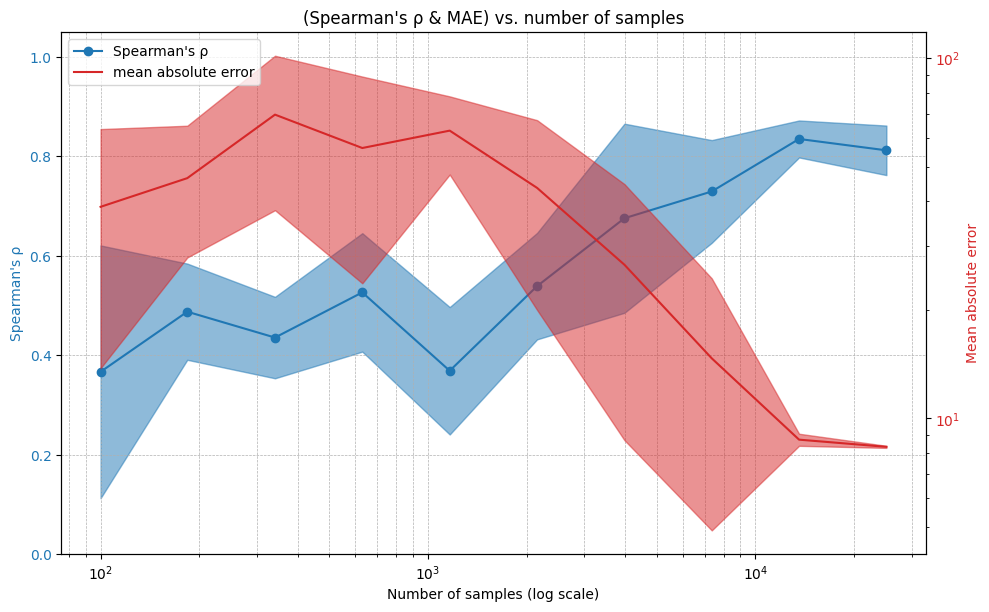

In [55]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# spearman's rho
color = 'tab:blue'
ax1.set_xlabel('Number of samples (log scale)')
ax1.set_ylabel("Spearman's ρ", color=color)
ax1.plot(num_samples, corr, marker='o', color=color, label="Spearman's ρ")
ax1.fill_between(num_samples, corr - std_corr, corr + std_corr, color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_ylim(0, 1.05)  # Spearman's rho ranges from -1 to 1
ax1.grid(True, which="both", ls="--", linewidth=0.5)

# mean absolute error
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mean absolute error', color=color)  
ax2.plot(num_samples, maes, color=color, label='mean absolute error')
ax2.fill_between(num_samples, maes - std_maes, maes + std_maes, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.grid(False) 

fig.tight_layout() 
plt.title("(Spearman's ρ & MAE) vs. number of samples")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Display the plot
plt.show()